**Demonstration of RoboPy plot(DisplayList) rendering capability using MPL (MatplotLib).**

In [1]:
import os  # for checking values of environment variables.

""" Matplotlib imports
"""
import matplotlib
matplotlib.use('Qt4Agg')
%matplotlib notebook
from matplotlib import rc         # needed to set Matplotlib animation._repr_html_()

rc('animation', html='jshtml')    # Matplotlib animations will be HTML wrapped JavaScript

""" RoboPy imports
"""
# Import requisite robopy modules.
import _robopy                             # locates desired robopy module
import robopy.base.graphics as graphics    # to perform graphics
import robopy.base.display_list as dList   # to use display lists
import robopy.base.transforms as tr        # to apply transforms
from robopy.base.mesh_geoms import *       # to use mesh geometric shapes
import numpy as np                         # to use NumPy ndarray type

Using RoboPy module /home/garyd/PycharmProjects/robopy/work/notebooks/dListMPL/../../../robopy.


In [2]:
# Define some GraphicsIPV parameters which will be used in plot()
# method calls in following cells.

dMode = 'IPY'
limits = [-0.5, 0.5, -0.5, 0.5, -0.5, 0.5]

In [3]:
# Define an object.
cyl = cylinder(0.2,0.2,0.05,0.1)  # create a cylinder

In [4]:
# Create two transformation matrices.
Rx = np.array( [[1,0,0,0], [0,0,-1,0], [0,1,0,0],[0,0,0,1]])
Ry = np.array( [[0,0,1,0],[0,1,0,0],[-1,0,0,0],[0,0,0,1]] )

In [5]:
# Create a DisplayList with 3 instances of the cylinder,
# keep the DisplayListItem references
dl = dList.DisplayList()
dl1 = dl.add('surface', 'cyl1', cyl, color='blue')
dl2 = dl.add('surface', 'cyl2', cyl, color='red')
dl3 = dl.add('surface', 'cyl3', cyl, color='green')

In [6]:
# Transform two of the cylinders by setting the transform field
dl2.transform = Rx
dl3.transform = Ry

<IPython.core.display.Javascript object>


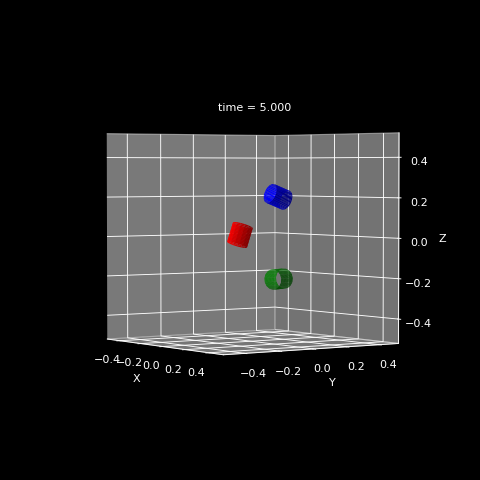

In [7]:
# Obtain a robopy graphics renderer with utilizes ipyvolume.
# Currently an empty Figure XYZ axes system will be displayed.
gMpl = graphics.GraphicsRenderer('MPL')  # sets graphics.gRenderer

In [8]:
# Resize the default figure
gMpl.getFigure().set_dpi(80)
gMpl.getFigure().set_size_inches((6,6), forward=True)

In [9]:
# Give graphics renderer the DisplayList to plot (gRenderer.plot()).
# Check cell [7] above for display of three cylinders - red, blue and green.
gMpl.plot(dl, limits=limits)

In [10]:
# Define transform function to animate DisplayListItems.
def transFunc(t):
    """
    Sample transformation function to rotate display list
    'surface' items about their x-axis.
    :param t: time (sec)
    :return: a homogeneous transform matrix
    """
    return tr.trotx(2.0*t, unit="deg")

In [11]:
# Give graphics renderer the DisplayList to animate.
# Check cell [7] for animated red, blue and green cylinders.
gMpl.animate(dl, transFunc, duration=5.0, frame_rate=30, limits=limits)

In [12]:
# Wait until the animation completes before running this cell to create a controlled animation.
gMpl.anim